# COMP 9517 Lab03

### Import Libraries

In [50]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

### Datasets Loading

In [51]:
#folder_path = 'Chinese_MINST_Dataset/data/data'

#data = []

#for f in os.listdir(folder_path):
     #img = plt.imread(os.path.join(folder_path, f))
     #img_class = int(f.split('.')[0].split('_')[3])
     #data.append({'image':img, 'class':img_class})

#df = pd.DataFrame(data)

#with open('data.pkl', 'wb') as f:
    #pickle.dump(df, f)

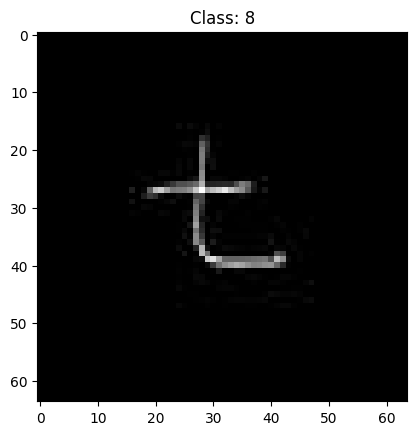

In [52]:
# Load preprocessed dataset
with open('data.pkl', 'rb') as f:
    df = pickle.load(f)

# Show a random sample
sample_idx = np.random.randint(len(df))
plt.imshow(df.iloc[sample_idx]['image'], cmap='gray')
plt.title(f"Class: {df.iloc[sample_idx]['class']}")
plt.show()

### Train/Test Split & Reshape

In [53]:
X_all = np.stack(df['image'].values) 
y_all = np.array(df['class'].values)  

X_rest, X_test, y_rest, y_test = train_test_split(
    X_all, y_all, test_size=1000, stratify=y_all, random_state=42
)

X_train_5k, _, y_train_5k, _ = train_test_split(
    X_rest, y_rest, train_size=5000, stratify=y_rest, random_state=42
)
X_train_10k, _, y_train_10k, _ = train_test_split(
    X_rest, y_rest, train_size=10000, stratify=y_rest, random_state=42
)

# Flatten images to vectors: 64*64 = 4096
X_train_5k = X_train_5k.reshape(len(X_train_5k), -1)
X_train_10k = X_train_10k.reshape(len(X_train_10k), -1)
X_test = X_test.reshape(len(X_test), -1)


### Evaluation & Plot Function

In [54]:
def evaluate_and_plot(y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Compute metrics
    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    cm = confusion_matrix(y_true, y_pred)

    # --- Plot 1: Confusion Matrix ---
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # --- Plot 2: Evaluation Metrics ---
    metrics = {
        'Accuracy': acc,
        'Precision (macro)': report['macro avg']['precision'],
        'Recall (macro)': report['macro avg']['recall'],
        'F1-score (macro)': report['macro avg']['f1-score']
    }

    plt.figure(figsize=(6, 4))
    plt.axis('tight')
    plt.axis('off')
    table_data = [[f"{v:.4f}"] for v in metrics.values()]
    table = plt.table(
        cellText=table_data,
        rowLabels=list(metrics.keys()),
        loc='center',
        cellLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2)
    plt.title(f'Evaluation Metrics - {title}', fontsize=14)
    plt.show()

    print(f"\n=== Classification Report: {title} ===")
    print(classification_report(y_true, y_pred))

### KNN

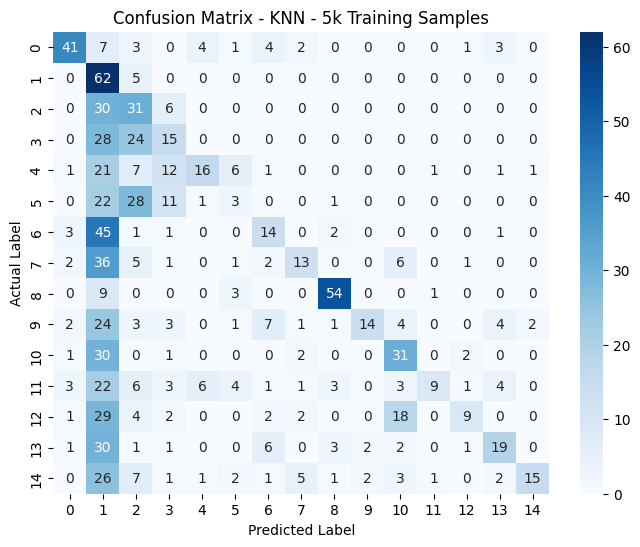

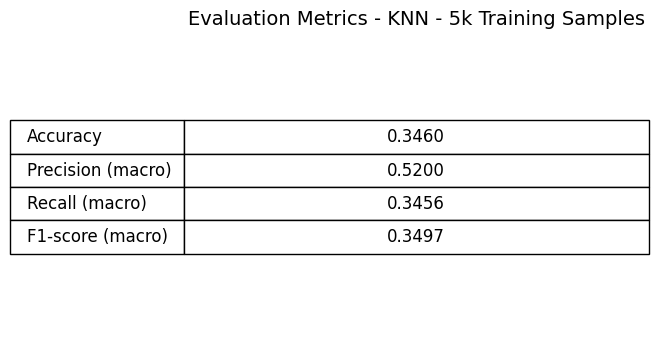


=== Classification Report: KNN - 5k Training Samples ===
              precision    recall  f1-score   support

           1       0.75      0.62      0.68        66
           2       0.15      0.93      0.25        67
           3       0.25      0.46      0.32        67
           4       0.26      0.22      0.24        67
           5       0.57      0.24      0.34        67
           6       0.14      0.05      0.07        66
           7       0.37      0.21      0.27        67
           8       0.50      0.19      0.28        67
           9       0.83      0.81      0.82        67
          10       0.78      0.21      0.33        66
          11       0.46      0.46      0.46        67
          12       0.75      0.14      0.23        66
          13       0.60      0.13      0.22        67
          14       0.56      0.29      0.38        66
          15       0.83      0.22      0.35        67

    accuracy                           0.35      1000
   macro avg       0.5

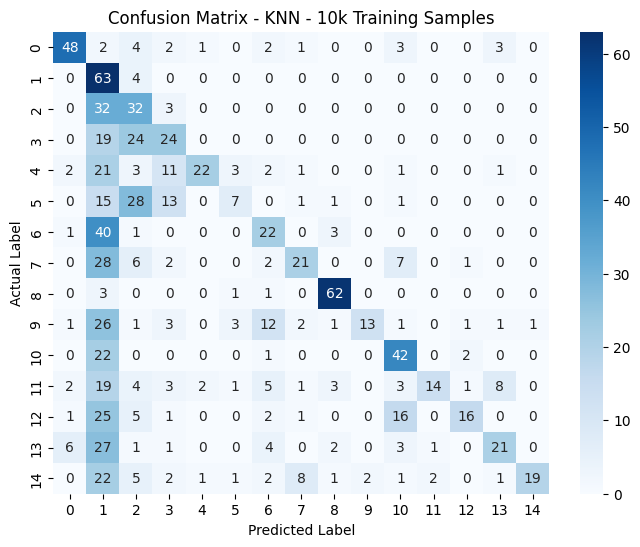

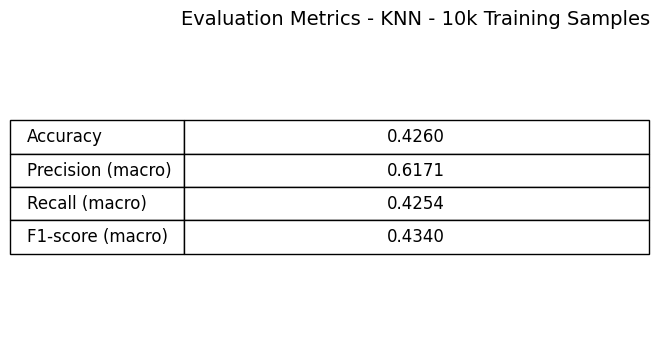


=== Classification Report: KNN - 10k Training Samples ===
              precision    recall  f1-score   support

           1       0.79      0.73      0.76        66
           2       0.17      0.94      0.29        67
           3       0.27      0.48      0.35        67
           4       0.37      0.36      0.36        67
           5       0.85      0.33      0.47        67
           6       0.44      0.11      0.17        66
           7       0.40      0.33      0.36        67
           8       0.58      0.31      0.41        67
           9       0.85      0.93      0.89        67
          10       0.87      0.20      0.32        66
          11       0.54      0.63      0.58        67
          12       0.82      0.21      0.34        66
          13       0.76      0.24      0.36        67
          14       0.60      0.32      0.42        66
          15       0.95      0.28      0.44        67

    accuracy                           0.43      1000
   macro avg       0.

In [55]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train_5k, y_train_5k)
y_pred_knn_5k = knn.predict(X_test)
evaluate_and_plot(y_test, y_pred_knn_5k, "KNN - 5k Training Samples")

knn.fit(X_train_10k, y_train_10k)
y_pred_knn_10k = knn.predict(X_test)
evaluate_and_plot(y_test, y_pred_knn_10k, "KNN - 10k Training Samples")

**KNN Conclusion**  
- **Overall**: Accuracy improved from 0.35 (5k) to 0.43 (10k), benefits from more data.  
- **Per-class**: Some classes (9, 15) are well-recognized while more with low recall which means high inter-class confusion.  
- **Optimization**: KNN struggles in very high-dimensional raw-pixel space — apply dimensionality reduction (PCA) or learned features (CNN), and consider tuning k or distance weighting.

### DT

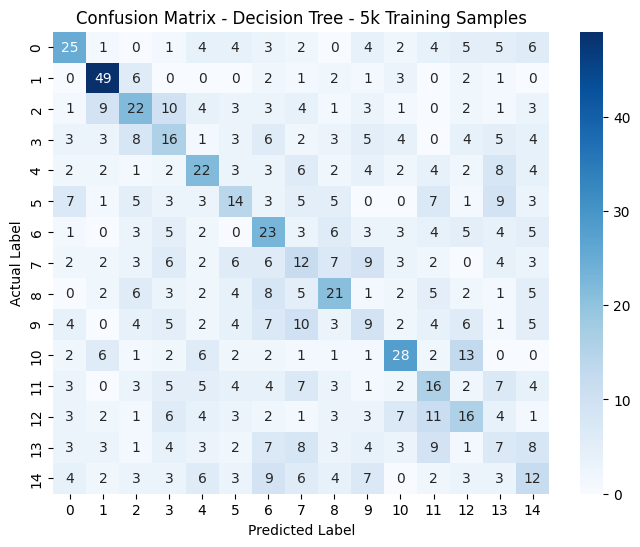

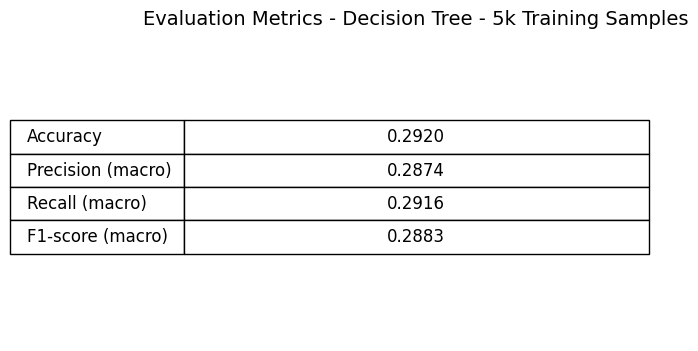


=== Classification Report: Decision Tree - 5k Training Samples ===
              precision    recall  f1-score   support

           1       0.42      0.38      0.40        66
           2       0.60      0.73      0.66        67
           3       0.33      0.33      0.33        67
           4       0.23      0.24      0.23        67
           5       0.33      0.33      0.33        67
           6       0.25      0.21      0.23        66
           7       0.26      0.34      0.30        67
           8       0.16      0.18      0.17        67
           9       0.33      0.31      0.32        67
          10       0.16      0.14      0.15        66
          11       0.45      0.42      0.43        67
          12       0.23      0.24      0.24        66
          13       0.25      0.24      0.24        67
          14       0.12      0.11      0.11        66
          15       0.19      0.18      0.18        67

    accuracy                           0.29      1000
   macro avg

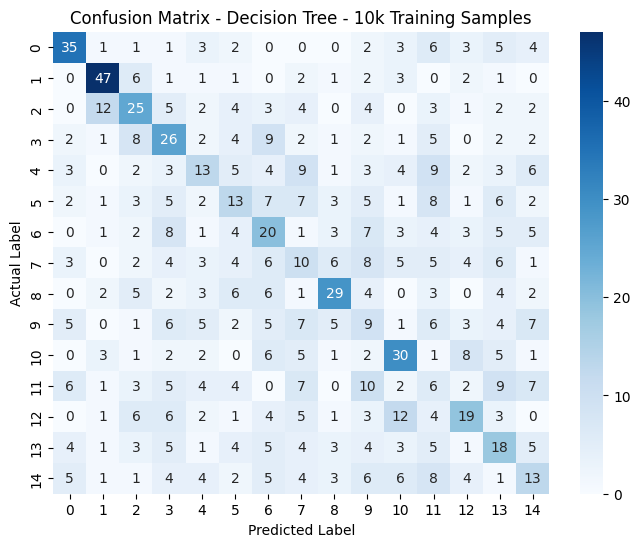

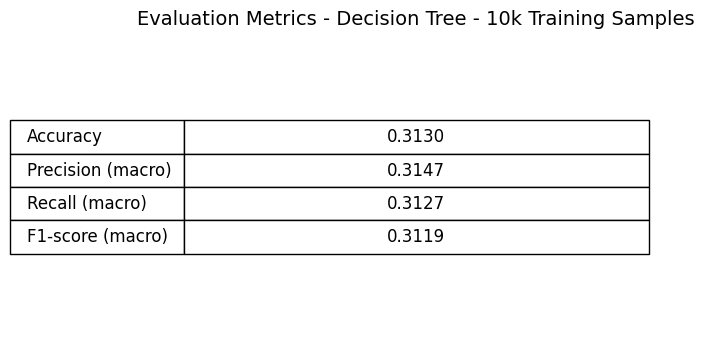


=== Classification Report: Decision Tree - 10k Training Samples ===
              precision    recall  f1-score   support

           1       0.54      0.53      0.53        66
           2       0.65      0.70      0.68        67
           3       0.36      0.37      0.37        67
           4       0.31      0.39      0.35        67
           5       0.27      0.19      0.23        67
           6       0.23      0.20      0.21        66
           7       0.25      0.30      0.27        67
           8       0.15      0.15      0.15        67
           9       0.51      0.43      0.47        67
          10       0.13      0.14      0.13        66
          11       0.41      0.45      0.43        67
          12       0.08      0.09      0.09        66
          13       0.36      0.28      0.32        67
          14       0.24      0.27      0.26        66
          15       0.23      0.19      0.21        67

    accuracy                           0.31      1000
   macro av

In [56]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_5k, y_train_5k)
y_pred_dt_5k = dt.predict(X_test)
evaluate_and_plot(y_test, y_pred_dt_5k, "Decision Tree - 5k Training Samples")

dt.fit(X_train_10k, y_train_10k)
y_pred_dt_10k = dt.predict(X_test)
evaluate_and_plot(y_test, y_pred_dt_10k, "Decision Tree - 10k Training Samples")

**Decision Tree Conclusion**  
- **Overall**: Very small increase (accuracy ~0.29 → 0.31); DT performs poorly on raw pixel inputs.  
- **Problem**: Many classes have low precision/recall — model likely learning unstable splits or fitting noise.  
- **Optimization**: Trees on raw high-dim pixels overfit or become unstable — use `max_depth`/pruning, or switch to ensemble methods or feature engineering.

### SGD

c:\Users\13512\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


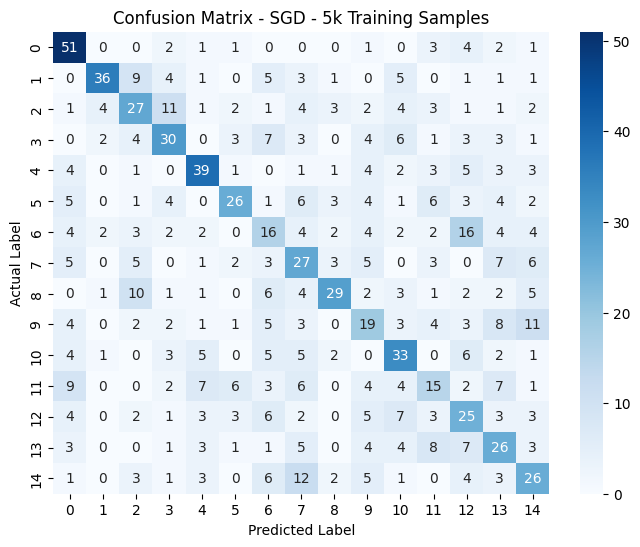

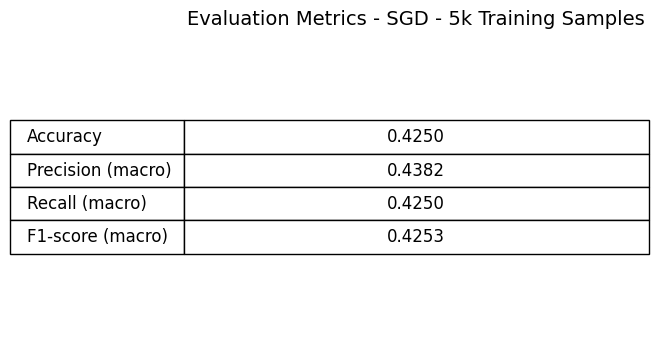


=== Classification Report: SGD - 5k Training Samples ===
              precision    recall  f1-score   support

           1       0.54      0.77      0.63        66
           2       0.78      0.54      0.64        67
           3       0.40      0.40      0.40        67
           4       0.47      0.45      0.46        67
           5       0.57      0.58      0.58        67
           6       0.57      0.39      0.46        66
           7       0.25      0.24      0.24        67
           8       0.32      0.40      0.36        67
           9       0.63      0.43      0.51        67
          10       0.30      0.29      0.29        66
          11       0.44      0.49      0.46        67
          12       0.29      0.23      0.25        66
          13       0.30      0.37      0.34        67
          14       0.34      0.39      0.37        66
          15       0.37      0.39      0.38        67

    accuracy                           0.42      1000
   macro avg       0.4

c:\Users\13512\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


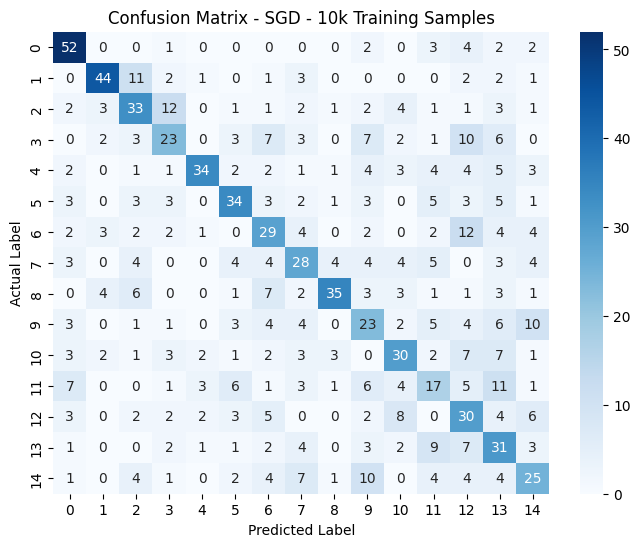

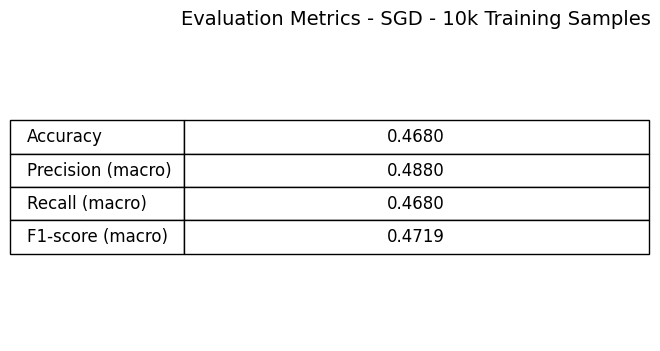


=== Classification Report: SGD - 10k Training Samples ===
              precision    recall  f1-score   support

           1       0.63      0.79      0.70        66
           2       0.76      0.66      0.70        67
           3       0.46      0.49      0.48        67
           4       0.43      0.34      0.38        67
           5       0.77      0.51      0.61        67
           6       0.56      0.52      0.54        66
           7       0.40      0.43      0.42        67
           8       0.42      0.42      0.42        67
           9       0.74      0.52      0.61        67
          10       0.32      0.35      0.34        66
          11       0.48      0.45      0.47        67
          12       0.29      0.26      0.27        66
          13       0.32      0.45      0.37        67
          14       0.32      0.47      0.38        66
          15       0.40      0.37      0.38        67

    accuracy                           0.47      1000
   macro avg       0.

In [57]:
# SGD Classifier
scaler_5k = StandardScaler()
X_train_5k_scaled = scaler_5k.fit_transform(X_train_5k)
X_test_scaled_5k = scaler_5k.transform(X_test)

sgd = SGDClassifier(max_iter=250, random_state=42)
sgd.fit(X_train_5k_scaled, y_train_5k)
y_pred_sgd_5k = sgd.predict(X_test_scaled_5k)
evaluate_and_plot(y_test, y_pred_sgd_5k, "SGD - 5k Training Samples")

scaler_10k = StandardScaler()
X_train_10k_scaled = scaler_10k.fit_transform(X_train_10k)
X_test_scaled_10k = scaler_10k.transform(X_test)

sgd.fit(X_train_10k_scaled, y_train_10k)
y_pred_sgd_10k = sgd.predict(X_test_scaled_10k)
evaluate_and_plot(y_test, y_pred_sgd_10k, "SGD - 10k Training Samples")

**SGD Conclusion**  
- **Overall**: Best performance, accuracy improved from 0.42 (5k) to 0.47 (10k).
- **Per-class**: More balanced precision/recall across classes compared to KNN and DT, indicating better generalization after scaling.  
- **Optimization**: Linear SGD benefits from StandardScaler; further gains likely from more epochs, hyperparameter tuning, regularization changes, or switching to learned features (CNNs).